## 🍬 [Day 10](https://adventofcode.com/2018/day/10)

In [0]:
import numpy as np

def aligned(points):
  """Heuristic criterion that works in practice, we want to find a configuration of points with minimal L2 distance
  i.e. points should be as close as possible"""
  return - np.mean(np.sum(np.abs(points[None, :, :] - points[:, None, :])**2, axis=-1))

def find_candidates(inputs, num_steps, first_step=0, scale=1, num_candidates=5):
  """We're applying the velocities to the points (rescaled by `scale`) for `num_steps`
    and starting from `first_step`"""
  # Store the score and actual number of steps for each iteration
  scores =  np.zeros((num_steps,))
  steps_taken = np.zeros((num_steps), dtype=np.int32) 
  # Init
  points = np.array(inputs[:, :2], dtype=np.float32)
  velocities = inputs[:, 2:]
  points += first_step * velocities
  # Iterate
  for i in range(num_steps):
    points += velocities * scale
    scores[i] = aligned(points)
    steps_taken[i] = int(scale) + (i > 0) * steps_taken[i - 1]
  #  Return steps with smallest L2 distance
  scores = np.argsort(- scores)
  print(' Best candidates', [steps_taken[x] + first_step for x in scores[:num_candidates]])

In [5]:
with open("day10.txt", 'r') as f:
  inputs = np.array([[int(x[10:16]), int(x[18:24]), int(x[36:38]), int(x[40:42])] 
                     for x in f.read().splitlines()])
  
print("Let's use a binary search style strategy.")
print("First we look over a large horizon, with a high scale")
find_candidates(inputs, 1000, scale=500)

print()
print("It seems there is something happening between 10500 and 11000")
print("so let's look at that more closely")
find_candidates(inputs, 500, first_step=10500)

Let's use a binary search style strategy.
First we look over a large horizon, with a high scale
 Best candidates [11000, 10500, 11500, 10000, 12000]

It seems there is something happening between 10500 and 11000
so let's look at that more closely
 Best candidates [10932, 10931, 10933, 10930, 10934]


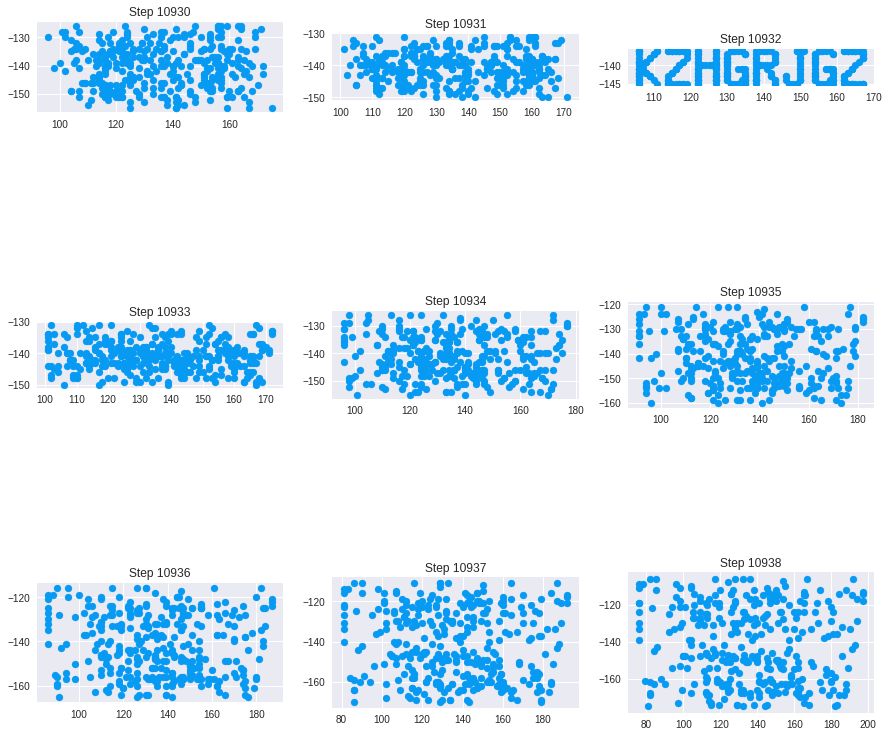

In [4]:
#@title Visualize
from matplotlib import pyplot as plt

def plot_candidates(inputs, step):
  _, axes = plt.subplots(3, 3, figsize=(15, 15))
  points = inputs[:, :2] + inputs[:, 2:] * step
  for i, ax in enumerate(axes.flatten()):
    # for some reason the points were flipped, better read by flipping the y-axis
    ax.scatter(points[:, 0], - points[:, 1], color='xkcd:azure')
    # This was necessary otherwise the auto-scaling makes the text unreadable
    ax.set_aspect('equal')
    ax.set_title('Step %d' % (step + i))
    points += inputs[:, 2:]
  plt.show()
  
# Finally let's plot things happening around the candidates values
plot_candidates(inputs, 10930)